In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-rent-prediction-dataset/Dataset Glossary.txt
/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv



Housing in India varies from palaces of erstwhile maharajas to modern apartment buildings in big cities to tiny huts in far-flung villages. There has been tremendous growth in India's housing sector as incomes have risen. The Human Rights Measurement Initiative finds that India is doing 60.9% of what should be possible at its level of income for the right to housing.

Renting, also known as hiring or letting, is an agreement where a payment is made for the temporary use of a good, service, or property owned by another. A gross lease is when the tenant pays a flat rental amount and the landlord pays for all property charges regularly incurred by the ownership. Renting can be an example of the sharing economy.

In this Dataset, we have information on almost 4700+ Houses/Apartments/Flats Available for Rent with different parameters like BHK, Rent, Size, No. of Floors, Area Type, Area Locality, City, Furnishing Status, Type of Tenant Preferred, No. of Bathrooms, Point of Contact.

Dataset Glossary

BHK: Number of Bedrooms, Hall, Kitchen.

Rent: Price of the Houses/Apartments/Flats.

Size: Size of the Houses/Apartments/Flats in Square Feet.

Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

Area Locality: Locality of the Houses/Apartments/Flats.

City: City where the Houses/Apartments/Flats are Located.

Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.

Bathroom: Number of Bathrooms.

Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
rent_data=pd.read_csv('/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv')
rent_data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


**Information about the Dataset**

In [4]:
rent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
rent_data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

**Observations:**

There is no null value for any column in the dataset, the data is clean!

In [6]:
rent_data.duplicated().sum()

0

**Observations:**

There is no duplicated values for any column in the dataset, the data is clean!

In [7]:
rent_data.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

Let's rename the attribute names to make them more understandable!

In [8]:
rent_data.rename(columns={'Posted On': 'datetime',
                        'BHK':'number_of_bedroom',
                        'Rent':'price',
                        'Size':'size_in_sqft',
                        'Area Type':'area_type',
                        'City':'city',
                        'Furnishing Status':'furnishing',
                        'Tenant Preferred':'tenant_preferred',
                        'Bathroom':'number_of_bathroom',
                        }, inplace=True)

In [9]:
rent_data.shape

(4746, 12)

In [10]:
rent_data.describe()

,number_of_bedroom,price,size_in_sqft,number_of_bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


**Data Analysis and Visualization**

**1.Pairplot of data**

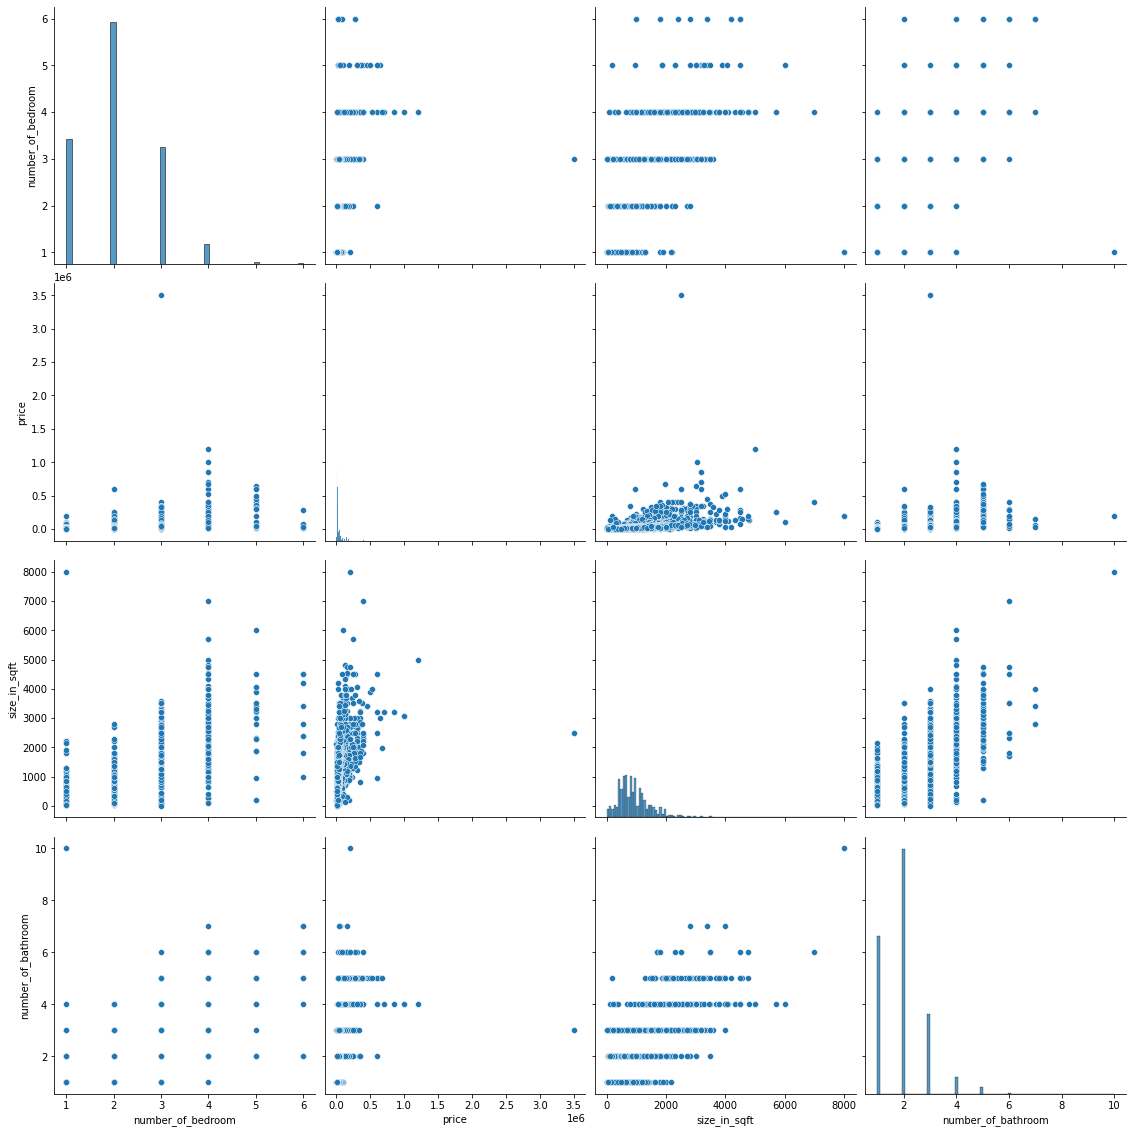

In [11]:
sns.pairplot(rent_data,height=4)
plt.show()

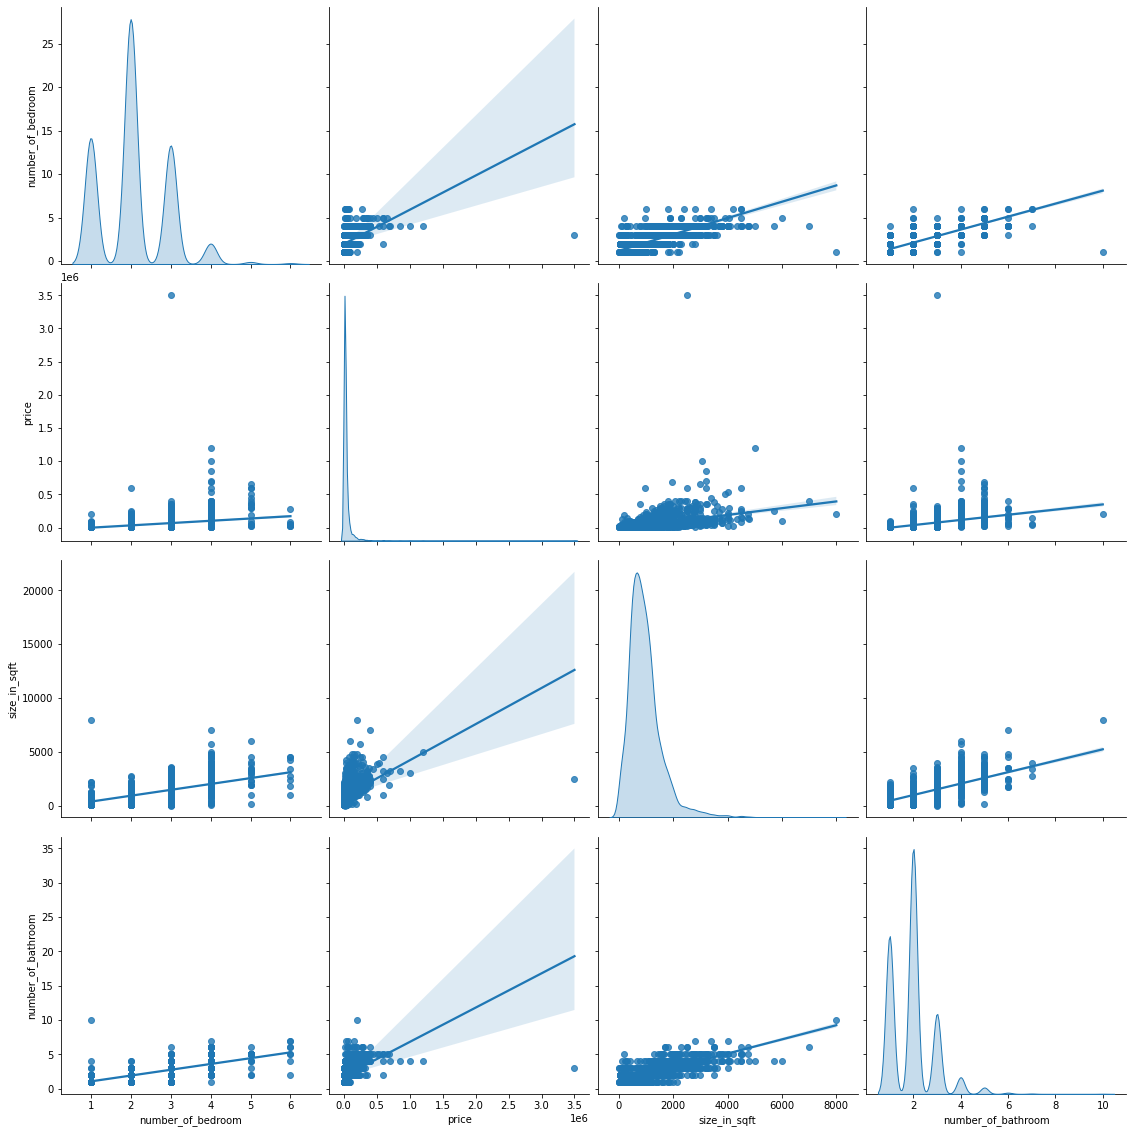

In [12]:
sns.pairplot(rent_data,kind='reg',height=4,diag_kind="kde")

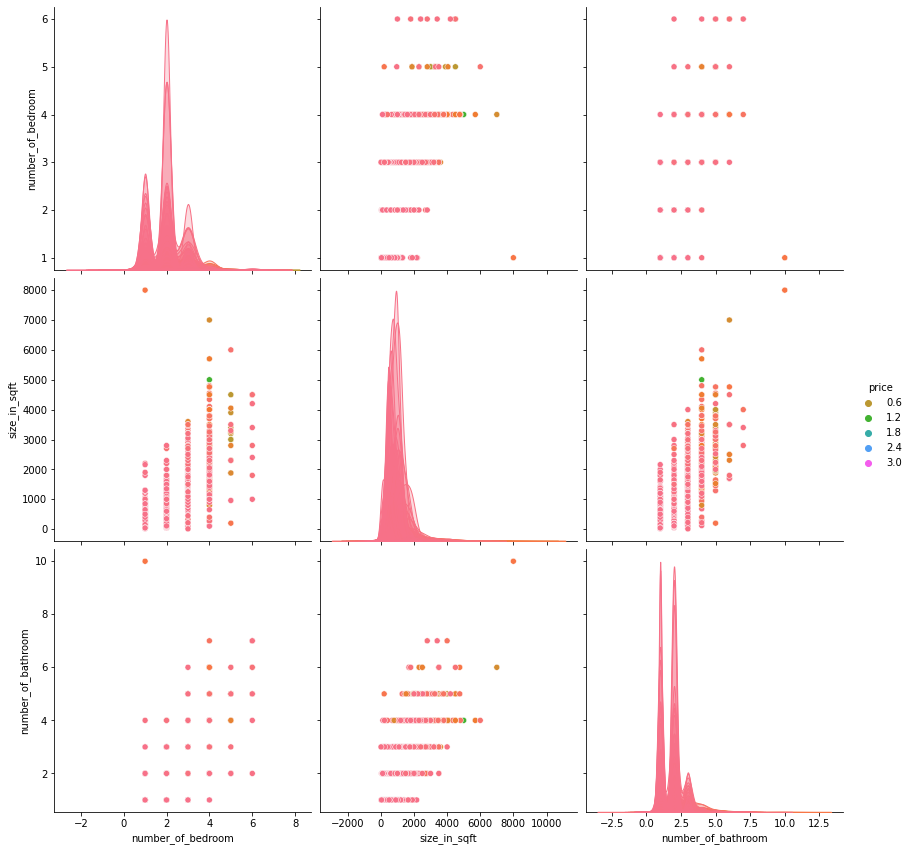

In [13]:
sns.pairplot(rent_data,height=4,hue="price",palette="husl") 

**2.Univariate Analysis**

**Price-Target Variable**

In [14]:
fig = px.histogram(rent_data,x='price',color_discrete_sequence = px.colors.qualitative.Set2, title="Rent Prices Distribution Histogram")
fig.show()
fig = px.box(rent_data, x="price", title='Boxplot for Rent Prices')
fig.show()

**Observations and Actions:**

From boxplot, we can see there is one outlier so far out of the inter-quantile range.

To remove outlier, as it may affect our assumptions about other variables and analysis


In [15]:
print(np.where(rent_data['price']>3000000))

(array([1837]),)


In [16]:
rent_data.drop([1837], axis=0, inplace=True)

fig = px.box(rent_data, x="price",title='Boxplot for Rent Prices')
fig.show()

**Bar Plot for Number of House in Each City which is Available for Rent**

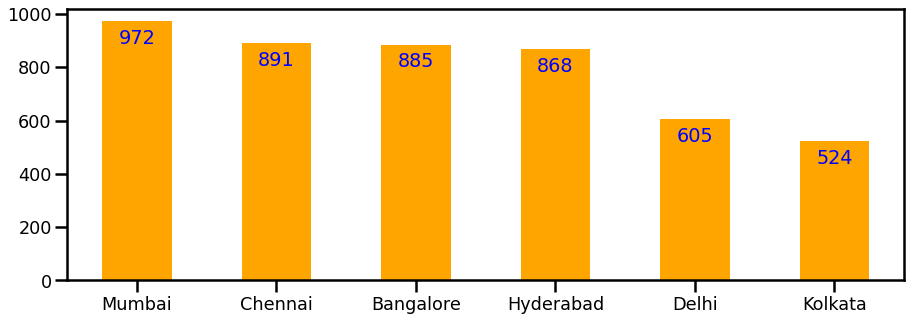

In [17]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (15, 5))
ax = rent_data["city"].value_counts().plot(kind = 'bar',
                                         color = "orange",
                                         rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 100), ha = 'center', va = 'bottom', color = 'blue')

**Analyze the distribution of size of house**

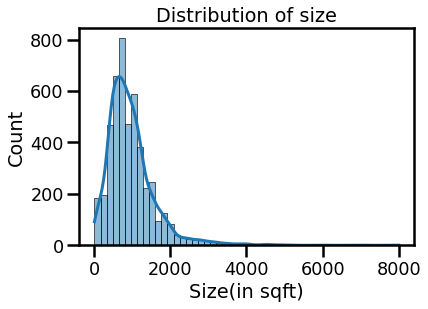

In [18]:
sns.histplot(data=rent_data[['size_in_sqft']],
             x='size_in_sqft',
             bins=50, kde='True',fill='Ture')
plt.title("Distribution of size")
plt.xlabel("Size(in sqft)")
plt.show()

**Distribution of all numeric columns**

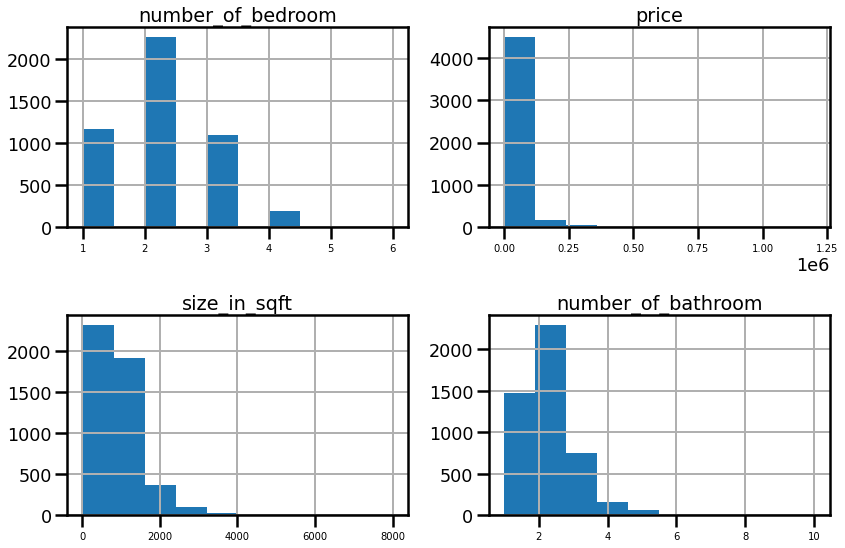

In [19]:
numeric_columns = rent_data.select_dtypes(include='int').columns.tolist()
rent_data[numeric_columns].hist(xlabelsize=10)
plt.tight_layout(rect=(2, 0, 4, 2))

**Visualizating the relationship between rent price and house size**

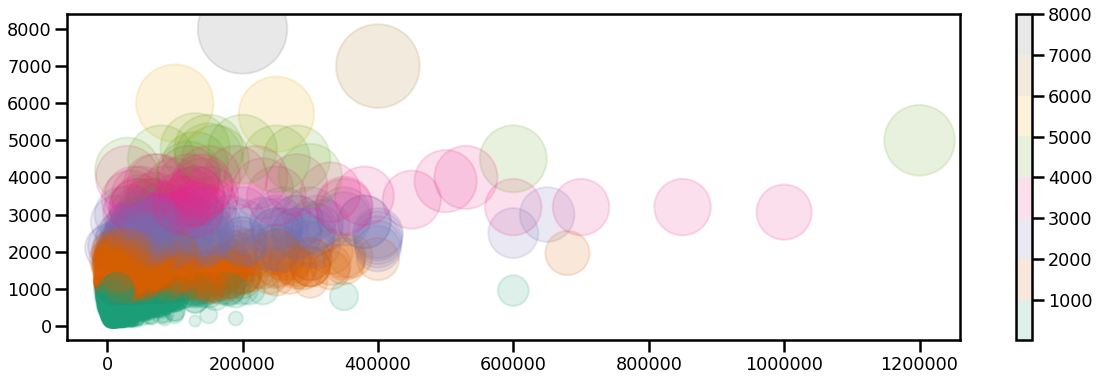

In [20]:
x = rent_data["price"]
y = rent_data["size_in_sqft"]
colors = rent_data["size_in_sqft"]
sizes = rent_data["size_in_sqft"]

plt.figure(figsize = (20, 6))
plt.ticklabel_format(style = 'plain')
plt.scatter(x, y, c = colors, s = sizes, alpha = 0.15, cmap = 'Dark2')
plt.colorbar();

**Visualizating the relationship between rent price and city**

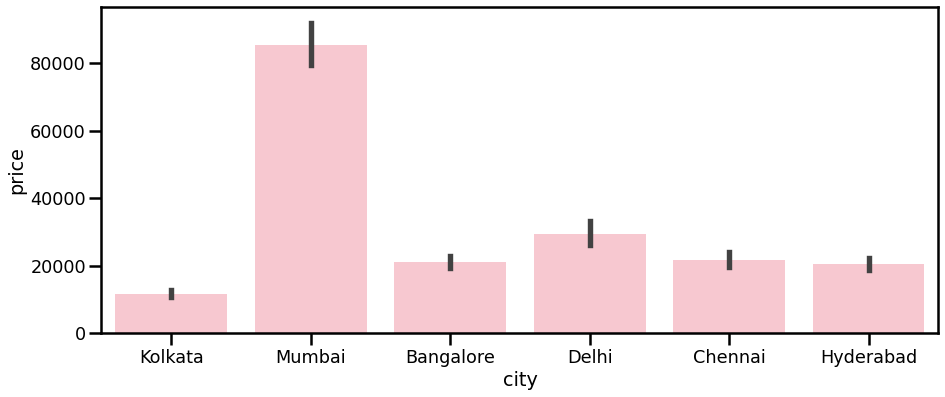

In [21]:
plt.figure(figsize = (15,6))
sns.barplot(x = rent_data["city"], y = rent_data["price"],color='pink');

**Correlation Visualization**

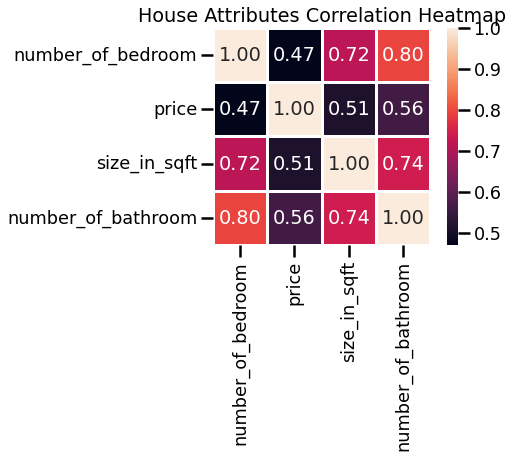

In [22]:
corr = rent_data.corr()
sns.heatmap(round(corr, 3), 
            annot=True, 
            fmt='.2f',
            square=True,
            linewidth=3,
            linecolor="white")
plt.title("House Attributes Correlation Heatmap")
plt.show()

**Observation:**

The size_in_sqft and number of bathroom and bedrooms have high correlation to the house rent among other attributes.  There is no such high correlation with price attribute.

**Let's find the best fit line- linear regression**

In [23]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-rent-prediction-dataset/Dataset Glossary.txt
/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv


In [24]:
data=pd.read_csv('../input/house-rent-prediction-dataset/House_Rent_Dataset.csv')
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [25]:
data.drop(data.columns[[0,4,5,6,7,8,9,11]],axis=1,inplace=True)
data

,BHK,Rent,Size,Bathroom
0,2,10000,1100,2
1,2,20000,800,1
2,2,17000,1000,1
3,2,10000,800,1
4,2,7500,850,1
...,...,...,...,...
4741,2,15000,1000,2
4742,3,29000,2000,3
4743,3,35000,1750,3
4744,3,45000,1500,2


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
data.head()

,BHK,Rent,Size,Bathroom
0,2,10000,1100,2
1,2,20000,800,1
2,2,17000,1000,1
3,2,10000,800,1
4,2,7500,850,1


In [28]:
x=data.iloc[:,1:4]
y=data.iloc[: , :-1]
print(x,y)

       Rent  Size  Bathroom
0     10000  1100         2
1     20000   800         1
2     17000  1000         1
3     10000   800         1
4      7500   850         1
...     ...   ...       ...
4741  15000  1000         2
4742  29000  2000         3
4743  35000  1750         3
4744  45000  1500         2
4745  15000  1000         2

[4746 rows x 3 columns]       BHK   Rent  Size
0       2  10000  1100
1       2  20000   800
2       2  17000  1000
3       2  10000   800
4       2   7500   850
...   ...    ...   ...
4741    2  15000  1000
4742    3  29000  2000
4743    3  35000  1750
4744    3  45000  1500
4745    2  15000  1000

[4746 rows x 3 columns]


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [30]:
from sklearn.linear_model import LinearRegression 

LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [31]:
y_prediction=LR.predict(x_test)
y_prediction

array([[1.42422491e+00, 1.00000000e+04, 6.00000000e+02],
       [1.35028643e+00, 7.00000000e+03, 4.00000000e+02],
       [2.60993595e+00, 1.60000000e+04, 8.50000000e+02],
       ...,
       [1.35042596e+00, 4.00000000e+03, 4.00000000e+02],
       [1.42413189e+00, 1.20000000e+04, 6.00000000e+02],
       [2.04476666e+00, 1.50000000e+04, 8.00000000e+02]])

In [32]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

score=r2_score(y_test,y_prediction)
print('r2 score is:',score)
print('mean_square_error is:',mean_squared_error(y_test,y_prediction))

r2 score is: 0.891624921594441
mean_square_error is: 0.07009928229331368


<AxesSubplot:xlabel='Size', ylabel='Rent'>

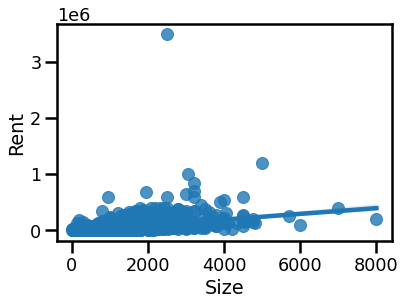

In [33]:
import seaborn as sns
sns.regplot(x='Size',y='Rent',data=data)

Conclusion: 

Final model score: lineair regression =89.16% 

GOOD MODEL!
